### Importing all necessary Directories & Functions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats

### The Objective  of Analysis 
### Using the available data, understand the underlying relation using Exploratory Data Analysis and use the insights to minimize the risk of losing money while lending to customers by using .


### Reading the Details from the csv file


In [2]:
loan_df=pd.read_csv('loan.csv',low_memory=False)

In [3]:
loan_df.head(10)
       

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Checking the data attributes

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan_df.shape

(39717, 111)

### Removing 'NaN' columns

In [6]:
loan_df.dropna(axis=1,how='all',inplace=True)
loan_df.shape

(39717, 57)

In [7]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Carry Further data cleaning in terms of removing unique values.

In [8]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [9]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [10]:
uniq_val = loan_df.nunique()
uniq_val.loc[uniq_val==1]
uniq_val.col=list(uniq_val[uniq_val==1].index)
len(uniq_val.col)

9

In [11]:
loan_df=loan_df.drop(uniq_val.col,axis=1)
loan_df.shape

(39717, 48)

### Look Data again and drop non-significant or large unique response.

In [12]:
loan_df.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
mths_since_last_record       111
last_credit_pull_d           106
last_pymnt_d                 101
mths_since

In [13]:
loan_df1=loan_df.drop(["id","url", "title", "emp_title", "zip_code", "last_credit_pull_d", "desc","out_prncp_inv","total_pymnt_inv",  "revol_bal","out_prncp","funded_amnt","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","open_acc","mths_since_last_delinq","mths_since_last_record","pub_rec_bankruptcies"],axis=1)

In [14]:
loan_df1.shape

(39717, 25)

In [15]:
loan_df1

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,pub_rec,revol_util,total_acc,total_pymnt,total_rec_prncp
0,1296599,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,AZ,27.65,0,Jan-85,1,0,83.70%,9,5863.155187,5000.00
1,1314167,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,GA,1.00,0,Apr-99,5,0,9.40%,4,1008.710000,456.46
2,1313524,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,IL,8.72,0,Nov-01,2,0,98.50%,10,3005.666844,2400.00
3,1277178,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,CA,20.00,0,Feb-96,1,0,21%,37,12231.890000,10000.00
4,1311748,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,OR,17.94,0,Jan-96,0,0,53.90%,38,3513.330000,2475.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,CO,11.33,0,Nov-90,0,0,13.10%,40,2822.969293,2500.00
39713,90607,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,NC,6.40,1,Dec-86,1,0,26.90%,9,9913.491822,8500.00
39714,90390,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,MA,2.30,0,Oct-98,0,0,19.40%,20,5272.161128,5000.00
39715,89243,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,MD,3.72,0,Nov-88,0,0,0.70%,26,5174.198551,5000.00


### The main objective of Analysis is the major factors contribute to fully paying and Charged off/Default, Current loan will not give any insight as we cannot predict/conclude, so excluding current loan from analysis

In [16]:
loan_df1=loan_df1[loan_df1.loan_status!="Current"]
loan_df1.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [17]:
loan_df1.shape

(38577, 25)

### Resolving the issue of missing value


In [18]:
(loan_df1.isnull().sum()/len(loan_df1.index))*100

member_id              0.000000
loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
delinq_2yrs            0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
total_pymnt            0.000000
total_rec_prncp        0.000000
dtype: float64

In [19]:
#we have mainly two columns (emp_length,revol_util) have missing elements 

In [20]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_id            38577 non-null  int64  
 1   loan_amnt            38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

In [21]:
print("The mode is",loan_df1.emp_length.mode())
loan_df1.emp_length.value_counts()


The mode is 0    10+ years
dtype: object


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### Mode have higher value than other so it is safe to replace the missing value with mode

In [100]:

loan_df1.emp_length.fillna("10+ years",inplace=True)
loan_df1.emp_length.isnull().sum()
loan_df1.shape

(38577, 32)

In [101]:
loan_df1["revol_util"]=loan_df1["revol_util"].astype("str")
loan_df1.dropna(subset=['revol_util'],inplace=True)
loan_df1.revol_util.isnull().sum()
loan_df1.shape

(38577, 32)

In [24]:
loan_status_percent = loan_df1['loan_status'].value_counts(normalize=True)
loan_status_percent

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

In [102]:
loan_df1["emp_length"]=loan_df1["emp_length"].astype("str")
loan_df1.emp_length = pd.to_numeric(loan_df1.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [103]:
loan_df1["int_rate"]=loan_df1["int_rate"].astype("str")
loan_df1.int_rate = pd.to_numeric(loan_df1.int_rate.apply(lambda x : x.split('%')[0]))

### We carry out all the data cleaning and standization and below is the 'head' of the cleansed data set

In [27]:
loan_df1.head(20)

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,pub_rec,revol_util,total_acc,total_pymnt,total_rec_prncp
0,1296599,5000,4975.00000,36 months,10.65,162.87,B,B2,10,RENT,...,AZ,27.65,0,Jan-85,1,0,83.70%,9,5863.155187,5000.00
1,1314167,2500,2500.00000,60 months,15.27,59.83,C,C4,0,RENT,...,GA,1.00,0,Apr-99,5,0,9.40%,4,1008.710000,456.46
2,1313524,2400,2400.00000,36 months,15.96,84.33,C,C5,10,RENT,...,IL,8.72,0,Nov-01,2,0,98.50%,10,3005.666844,2400.00
3,1277178,10000,10000.00000,36 months,13.49,339.31,C,C1,10,RENT,...,CA,20.00,0,Feb-96,1,0,21%,37,12231.890000,10000.00
5,1311441,5000,5000.00000,36 months,7.90,156.46,A,A4,3,RENT,...,AZ,11.20,0,Nov-04,3,0,28.30%,12,5632.210000,5000.00
6,1304742,7000,7000.00000,60 months,15.96,170.08,C,C5,8,RENT,...,NC,23.51,0,Jul-05,1,0,85.60%,11,10110.840000,6985.61
7,1288686,3000,3000.00000,36 months,18.64,109.43,E,E1,9,RENT,...,CA,5.35,0,Jan-07,2,0,87.50%,4,3939.135294,3000.00
8,1306957,5600,5600.00000,60 months,21.28,152.39,F,F2,4,OWN,...,CA,5.55,0,Apr-04,2,0,32.60%,13,646.020000,162.02
9,1306721,5375,5350.00000,60 months,12.69,121.45,B,B5,0,RENT,...,TX,18.08,0,Sep-04,0,0,36.50%,3,1476.190000,673.48
10,1305201,6500,6500.00000,60 months,14.65,153.45,C,C3,5,OWN,...,AZ,16.12,0,Jan-98,2,0,20.60%,23,7678.017673,6500.00


# We have a cleansed data frame , let us move towards for  EDA. 




### Univariate Analysis
Let us start by understanding the correlation between the different numeric fields and see if there is positive coorelation or not (high correlation values)

#### Let us visualize the data in a Heat Map 

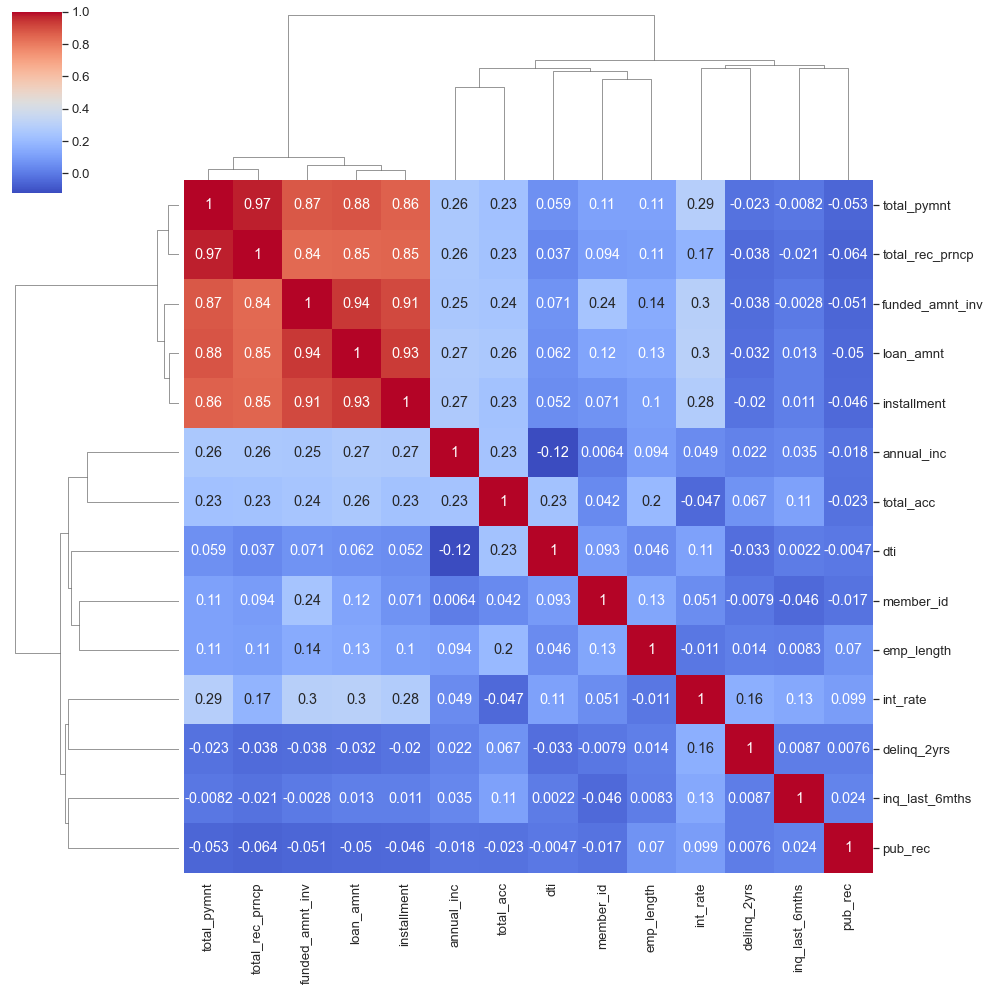

In [28]:
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
sns.clustermap(data=loan_df1.corr(), cmap='coolwarm', figsize=(14,14),annot=True)
plt.show()

### We have Positive Correlation Among Below Values


####  loan_amnt, funded_amnt, funded_amnt_inv and installment 

#### public records related fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

# Loan status vs Numerical continuous variables

Let us now compare the loan_status fields with all the numerical variable. 
Since the analysis for this category will be similar, let us construct a common function which can be used for all.

In [29]:
# here are some of the global settings/constants that will be referred to within the functions defined below
colors = ["lightgreen","cyan"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
# loan_status_pct from above will be used in the below functions as well

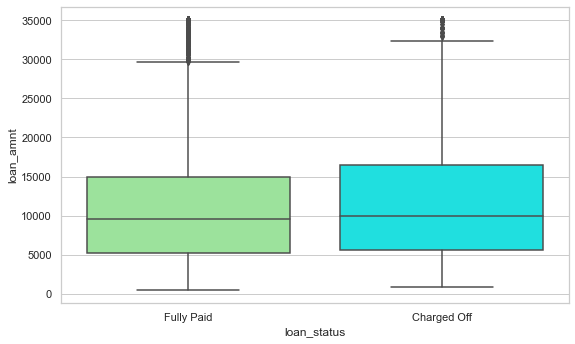

In [30]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_df1)
plt.show()

#### There is no clear correlation between loan_status ,loan_amount , there is some outliers in loan amount 

In [31]:
loan_df1['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### since we see there is huge difference between 75% and maximum, let us limit our analysis to 75%

In [32]:
loan_till_75per = loan_df1.loc[(loan_df1['loan_amnt']<=15000)]

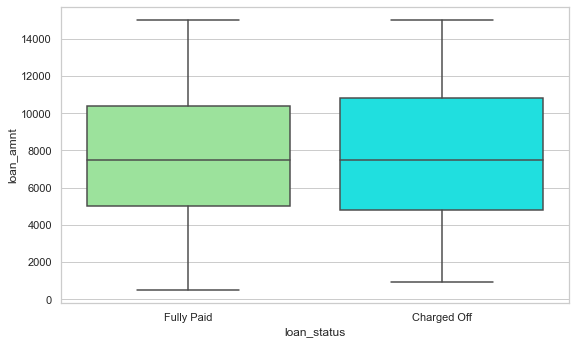

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till_75per)
plt.show()

since it is giving picture , let us take date data above 75%

In [34]:
loan_above_75per = loan_df1.loc[(loan_df1['loan_amnt']>=15000)]
loan_above_75per.head()

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,pub_rec,revol_util,total_acc,total_pymnt,total_rec_prncp
20,1284848,20250,19142.16108,60 months,15.27,484.63,C,C4,3,RENT,...,TX,26.53,0,Nov-97,3,0,85.60%,22,27679.05000,20250.00
21,1269083,21000,21000.00000,36 months,12.42,701.73,B,B4,10,RENT,...,FL,13.22,0,Feb-83,0,0,90.30%,38,14025.40000,10694.96
25,1273773,15000,15000.00000,36 months,9.91,483.38,B,B1,2,MORTGAGE,...,IL,29.44,0,Feb-02,0,0,93.90%,31,15823.99905,15000.00
26,1304679,15000,8725.00000,36 months,14.27,514.64,C,C2,9,RENT,...,NY,15.22,0,Oct-03,1,0,57.60%,11,0.00000,0.00
31,1304608,31825,31825.00000,36 months,7.90,995.82,A,A4,5,MORTGAGE,...,NJ,14.03,0,Nov-81,0,0,27.40%,26,34886.91378,31825.00


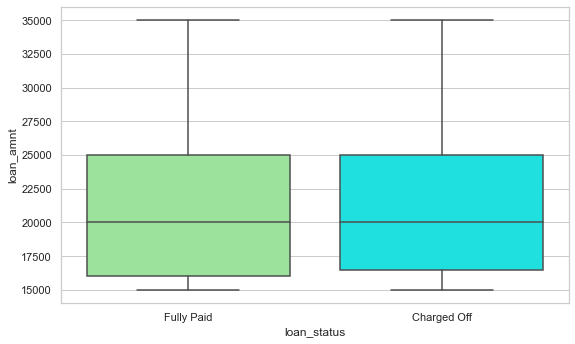

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above_75per)
plt.show()

### From above box plot we are not considering that "higher the amount" as it is insignificant

#### Defining some default functions, so that we can re-use same function
for the columns 

In [36]:
def PercentileCut (*, data=loan_df1, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loan'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [37]:
loan_df1.columns

Index(['member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'pub_rec', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp'],
      dtype='object')

In [38]:
def Univariate_Categorical (*, data=loan_df1, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loan_df1.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loan_df1.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()        

In [39]:
import warnings
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignoredPercentileCut(column='loan_amnt')


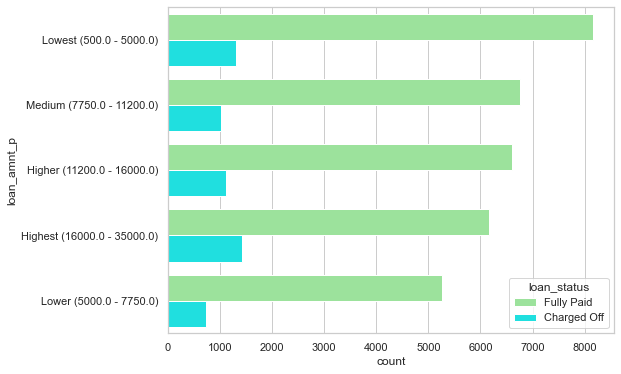

loan_amnt_p,Charged off %,Record count
Highest (16000.0 - 35000.0),0.187624,7579
Higher (11200.0 - 16000.0),0.145368,7739
Lowest (500.0 - 5000.0),0.138725,9472
Medium (7750.0 - 11200.0),0.131613,7788
Lower (5000.0 - 7750.0),0.123521,5999


In [40]:
PercentileCut(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_p')

#### If the loan amount is increasing, there is a high probablity of  loan getting default.

In [41]:
loan_df1['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [42]:
loan_df1['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [43]:
#Let's remvoe %
loan_df1['int_rate']=loan_df1['int_rate'].astype("str")
loan_df1['int_rate'] = loan_df1['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_df1['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

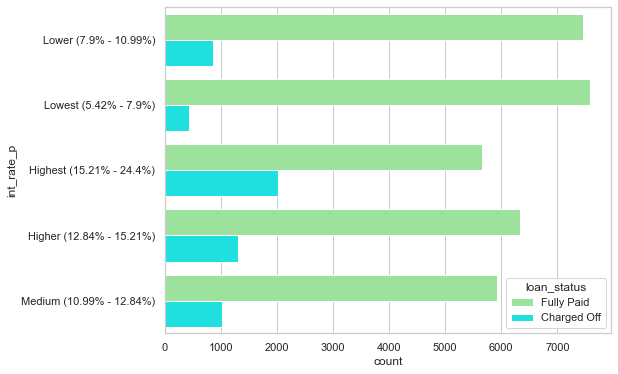

int_rate_p,Charged off %,Record count
Highest (15.21% - 24.4%),0.262150,7675
Higher (12.84% - 15.21%),0.171619,7639
Medium (10.99% - 12.84%),0.146995,6939
Lower (7.9% - 10.99%),0.102876,8311
Lowest (5.42% - 7.9%),0.053538,8013


In [44]:
PercentileCut(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')

### If the intrest rate is higher, the chance for 'charged off' is more 

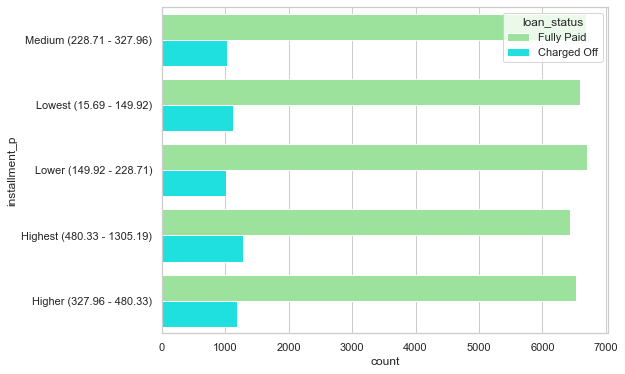

installment_p,Charged off %,Record count
Highest (480.33 - 1305.19),0.166321,7714
Higher (327.96 - 480.33),0.152988,7713
Lowest (15.69 - 149.92),0.145153,7716
Medium (228.71 - 327.96),0.132936,7718
Lower (149.92 - 228.71),0.131934,7716


In [45]:
PercentileCut(column='installment')
Univariate_Categorical(column='installment_p')

#### There is no that signifacnt correlation between installment_p and charged off

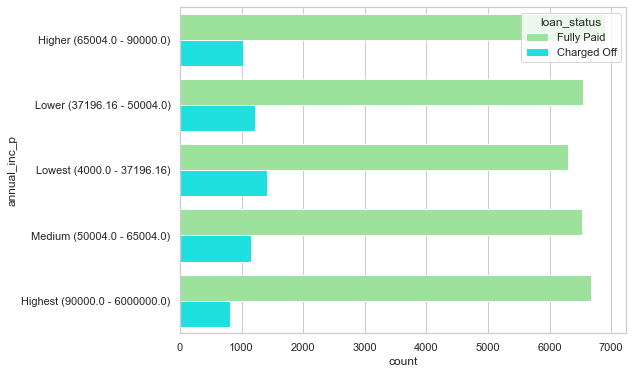

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 37196.16),0.183126,7716
Lower (37196.16 - 50004.0),0.156926,7768
Medium (50004.0 - 65004.0),0.149629,7679
Higher (65004.0 - 90000.0),0.129651,7929
Highest (90000.0 - 6000000.0),0.109285,7485


In [46]:
PercentileCut(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')

#### Higher the income higher the repayment %

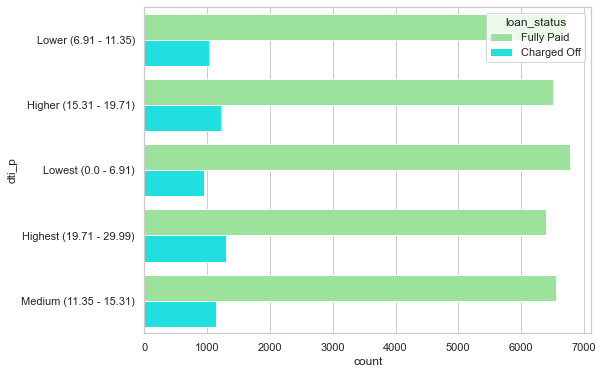

dti_p,Charged off %,Record count
Highest (19.71 - 29.99),0.168853,7699
Higher (15.31 - 19.71),0.157908,7726
Medium (11.35 - 15.31),0.147609,7696
Lower (6.91 - 11.35),0.132627,7736
Lowest (0.0 - 6.91),0.122409,7720


In [47]:
PercentileCut(column='dti')
Univariate_Categorical(column='dti_p')

#### As the debt increase the chance of "Charged off" also increases.

In [48]:
loan_df1['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [49]:
loan_df1['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [50]:
print(loan_df['emp_title'].value_counts().head())
print(loan_df['emp_title'].unique().shape)

US Army              134
Bank of America      109
IBM                   66
AT&T                  59
Kaiser Permanente     56
Name: emp_title, dtype: int64
(28821,)


In [51]:
loan_df1['emp_length'].unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7], dtype=int64)

In [52]:
loan_df['emp_length'].isnull().sum()

1075

In [53]:
loan_df1.columns

Index(['member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'pub_rec', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'loan_amnt_p', 'int_rate_p', 'installment_p',
       'annual_inc_p', 'dti_p'],
      dtype='object')

In [54]:
loan_df1['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [55]:
loan_df1['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [56]:
loan_df1['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

let's split the month and year

In [57]:
m,y = loan_df1['issue_d'].str.split('-').str

In [58]:
y.value_counts()

11    20516
10    11532
09     4716
08     1562
07      251
Name: issue_d, dtype: int64

In [59]:
m.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_d, dtype: int64

let us add new column like issued_year and issued_month which will be useful for our further analysis and drop this issue_d column


In [60]:

loan_df1['issue_y'] = pd.to_numeric(y,errors='ignore')
loan_df1['issue_m'] = m
loan_df1.drop(columns=['issue_d'], inplace=True)

In [61]:
loan_df1.head(50)

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,total_pymnt,total_rec_prncp,loan_amnt_p,int_rate_p,installment_p,annual_inc_p,dti_p,issue_y,issue_m
0,1296599,5000,4975.00000,36 months,10.65,162.87,B,B2,10,RENT,...,9,5863.155187,5000.00,Lowest (500.0 - 5000.0),Lower (7.9% - 10.99%),Lower (149.92 - 228.71),Lowest (4000.0 - 37196.16),Highest (19.71 - 29.99),11,Dec
1,1314167,2500,2500.00000,60 months,15.27,59.83,C,C4,0,RENT,...,4,1008.710000,456.46,Lowest (500.0 - 5000.0),Highest (15.21% - 24.4%),Lowest (15.69 - 149.92),Lowest (4000.0 - 37196.16),Lowest (0.0 - 6.91),11,Dec
2,1313524,2400,2400.00000,36 months,15.96,84.33,C,C5,10,RENT,...,10,3005.666844,2400.00,Lowest (500.0 - 5000.0),Highest (15.21% - 24.4%),Lowest (15.69 - 149.92),Lowest (4000.0 - 37196.16),Lower (6.91 - 11.35),11,Dec
3,1277178,10000,10000.00000,36 months,13.49,339.31,C,C1,10,RENT,...,37,12231.890000,10000.00,Medium (7750.0 - 11200.0),Higher (12.84% - 15.21%),Higher (327.96 - 480.33),Lower (37196.16 - 50004.0),Highest (19.71 - 29.99),11,Dec
5,1311441,5000,5000.00000,36 months,7.90,156.46,A,A4,3,RENT,...,12,5632.210000,5000.00,Lowest (500.0 - 5000.0),Lowest (5.42% - 7.9%),Lower (149.92 - 228.71),Lowest (4000.0 - 37196.16),Lower (6.91 - 11.35),11,Dec
6,1304742,7000,7000.00000,60 months,15.96,170.08,C,C5,8,RENT,...,11,10110.840000,6985.61,Lower (5000.0 - 7750.0),Highest (15.21% - 24.4%),Lower (149.92 - 228.71),Lower (37196.16 - 50004.0),Highest (19.71 - 29.99),11,Dec
7,1288686,3000,3000.00000,36 months,18.64,109.43,E,E1,9,RENT,...,4,3939.135294,3000.00,Lowest (500.0 - 5000.0),Highest (15.21% - 24.4%),Lowest (15.69 - 149.92),Lower (37196.16 - 50004.0),Lowest (0.0 - 6.91),11,Dec
8,1306957,5600,5600.00000,60 months,21.28,152.39,F,F2,4,OWN,...,13,646.020000,162.02,Lower (5000.0 - 7750.0),Highest (15.21% - 24.4%),Lower (149.92 - 228.71),Lower (37196.16 - 50004.0),Lowest (0.0 - 6.91),11,Dec
9,1306721,5375,5350.00000,60 months,12.69,121.45,B,B5,0,RENT,...,3,1476.190000,673.48,Lower (5000.0 - 7750.0),Medium (10.99% - 12.84%),Lowest (15.69 - 149.92),Lowest (4000.0 - 37196.16),Higher (15.31 - 19.71),11,Dec
10,1305201,6500,6500.00000,60 months,14.65,153.45,C,C3,5,OWN,...,23,7678.017673,6500.00,Lower (5000.0 - 7750.0),Higher (12.84% - 15.21%),Lower (149.92 - 228.71),Higher (65004.0 - 90000.0),Higher (15.31 - 19.71),11,Dec


In [62]:
loan_df1['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [63]:
len(loan_df['title'].value_counts())

19615

In [64]:
loan_df['title'].head(10)

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
4                                 Personal
5    My wedding loan I promise to pay back
6                                     Loan
7                          Car Downpayment
8     Expand Business & Buy Debt Portfolio
9              Building my credit history.
Name: title, dtype: object

In [65]:
loan_df['title'].sample(10)

22373             Basketball Court
24024           POLE BUILDING LOAN
27770      Consolidate my NYC Debt
18736    Debt Consolidation/Moving
14398                       Moving
4711                     Pool Loan
33640          fiscallyresponsible
36756                         Cash
22750           debt consolidation
23160             unexpected costs
Name: title, dtype: object

since title column has too many unique values... let us drop this column as it may not be useful to keep it 

In [66]:
loan_df.drop(columns=['title'], inplace=True)

loan_df['addr_state'].value_counts()

In [67]:
loan_df1['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [68]:
m, y = loan_df1['earliest_cr_line'].str.split('-').str
y.value_counts()

00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: earliest_cr_line, dtype: int64

###### cr_line field, we do see some data format inconsistencies. Sometimes it has MMM-YY and at other times it has YY-MMM. Also, the year is a 2 digit and not Y2K corrected. Therefre, we would need to apply some logic to extract meaningful data from here

In [69]:
from datetime import datetime
today = datetime.today()
today.year

2022

In [70]:
def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
days_from_earliest_cr_line("Dec-20")

462

In [71]:
loan_df1['days_from_earliest_cr_line'] = loan_df1['earliest_cr_line'].apply(days_from_earliest_cr_line)
loan_df1['days_from_earliest_cr_line'].describe()

count    38577.000000
mean      9162.981647
std       2491.854695
min       4875.000000
25%       7493.000000
50%       8712.000000
75%      10324.000000
max      27825.000000
Name: days_from_earliest_cr_line, dtype: float64

In [72]:
loan_df1.drop(columns=['earliest_cr_line'], inplace=True)

In [73]:
loan_df1['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [74]:
#let us convert these values in numberics by removing %
loan_df1['revol_util'] = pd.Series(loan_df1['revol_util']).str.replace('%', '').astype(float)
loan_df1['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

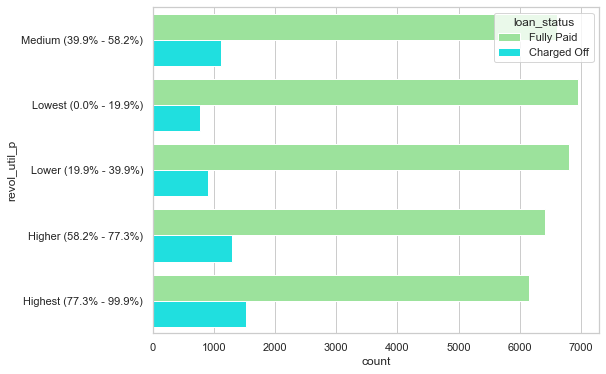

revol_util_p,Charged off %,Record count
Highest (77.3% - 99.9%),0.198069,7664
Higher (58.2% - 77.3%),0.167727,7703
Medium (39.9% - 58.2%),0.145001,7731
Lower (19.9% - 39.9%),0.118356,7714
Lowest (0.0% - 19.9%),0.099417,7715


In [75]:
PercentileCut(column='revol_util',trailer='%')
Univariate_Categorical(column='revol_util_p')

#### Above plot shows that the revolving line utilization rate has a large impact to the default percentage. When this increases, the charged off percentage rises.

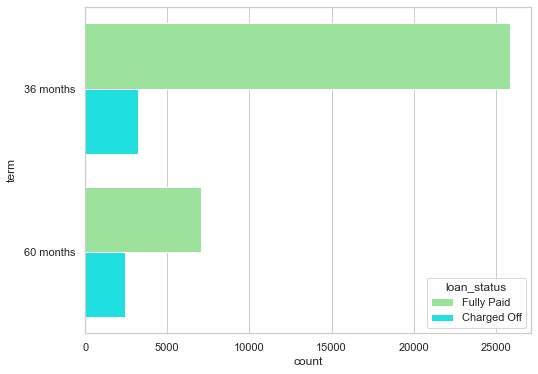

term,Charged off %,Record count
60 months,0.253138,9481
36 months,0.110909,29096


In [76]:
Univariate_Categorical(column='term')

###### For loans with 60 months term the default percent is 25%. and for 36 months term the default is only for 11% of the cases. If higher the repayment term chances of charge off will be higher

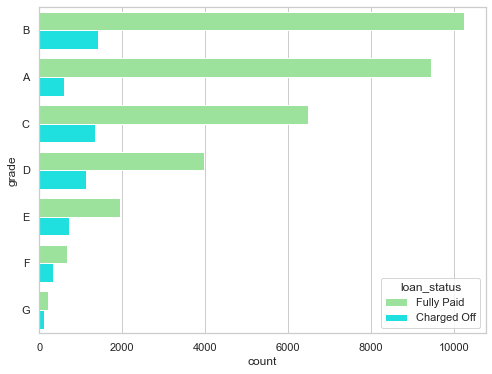

grade,Charged off %,Record count
G,0.337793,299
F,0.326844,976
E,0.268494,2663
D,0.219862,5085
C,0.171943,7834
B,0.122056,11675
A,0.059930,10045


In [77]:
Univariate_Categorical(column='grade')

###### We can clearly see that loan grades having highest default percentages. G, F, E and D form grades where default rate is much higher than others.


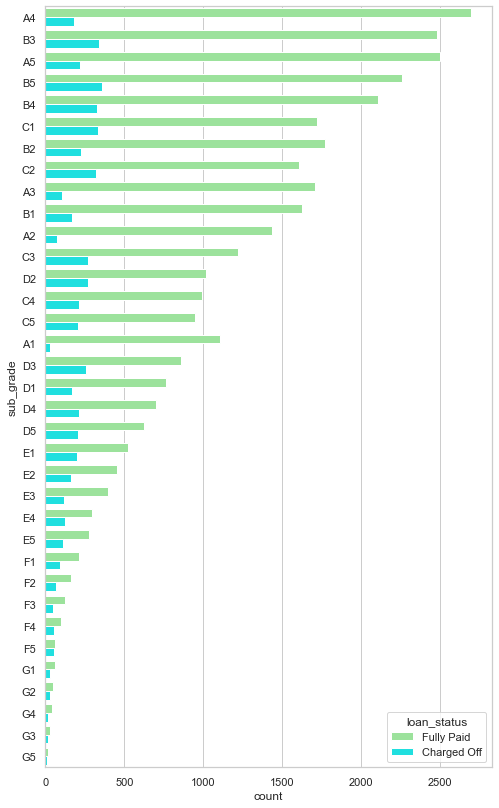

sub_grade,Charged off %,Record count
F5,0.477876,113
G3,0.422222,45
G2,0.363636,77
F4,0.350993,151
G5,0.344828,29
G1,0.329787,94
F2,0.300429,233
F1,0.298361,305
E4,0.297170,424
F3,0.293103,174


In [78]:
Univariate_Categorical(column='sub_grade', figsize=(8,14))

###### The above table shows the loan sub-grade versus the default percentage. The F5 and  G3sub categories have above 40% default rate. This field is a clear indicator of the default percent.

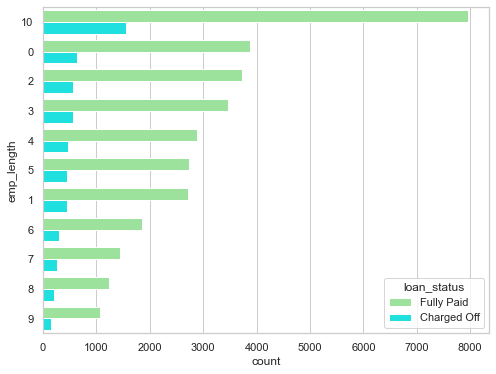

emp_length,Charged off %,Record count
10,0.163743,9521
7,0.153711,1711
1,0.143894,3169
5,0.143394,3194
0,0.141748,4508
6,0.141605,2168
8,0.141463,1435
3,0.138335,4012
4,0.138241,3342
2,0.132137,4291


In [79]:
Univariate_Categorical(column='emp_length')

###### There is nothing much to conclude from above data, we can see having no employment will lead to Defaulted payment

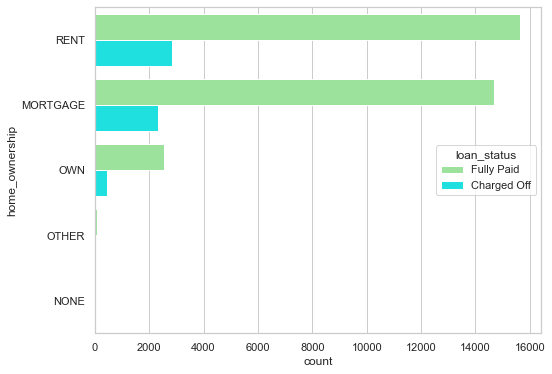

home_ownership,Charged off %,Record count
OTHER,0.183673,98
RENT,0.153626,18480
OWN,0.148908,2975
MORTGAGE,0.136713,17021


In [80]:
Univariate_Categorical(column='home_ownership')

###### Nothing  to conclude as it says "OTHER", 

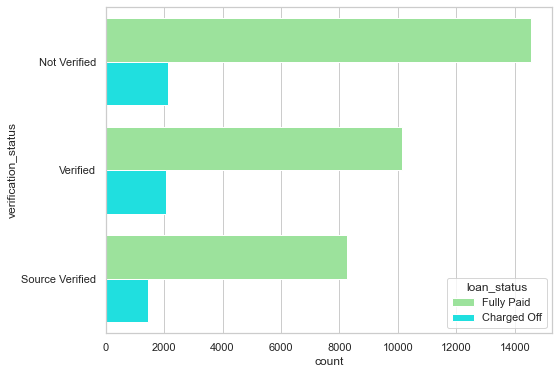

verification_status,Charged off %,Record count
Verified,0.168032,12206
Source Verified,0.148186,9677
Not Verified,0.128310,16694


In [81]:
Univariate_Categorical(column='verification_status')

######  verified applicants have more defaulted % which means the verifiaction have no significance on charged off %

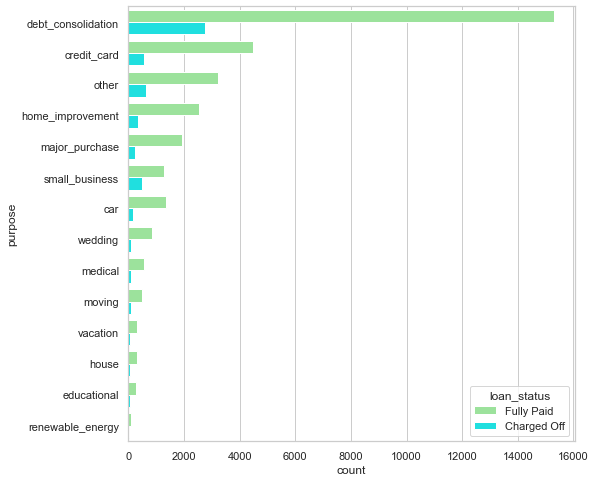

purpose,Charged off %,Record count
small_business,0.270810,1754
renewable_energy,0.186275,102
educational,0.172308,325
other,0.163777,3865
house,0.160763,367
moving,0.159722,576
medical,0.155653,681
debt_consolidation,0.153254,18055
vacation,0.141333,375
home_improvement,0.120696,2875


In [82]:
Univariate_Categorical(column='purpose', figsize=(8,8))

###### The plot shown loan  for small_business, renewable_energy and educational are the riskier ones.

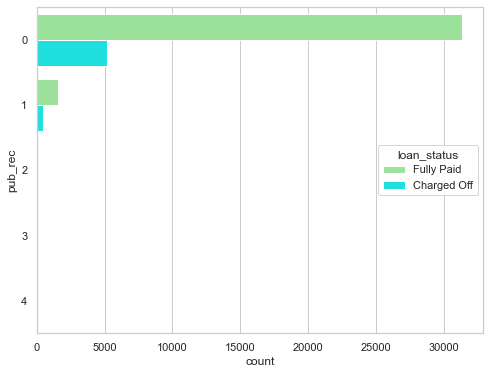

pub_rec,Charged off %,Record count
1,0.227024,2013
2,0.208333,48
0,0.141343,36507


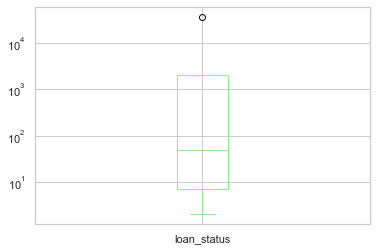

In [83]:
Univariate_Categorical(column='pub_rec', box_plot=True)

###### In the plot individuals with non-zero derogatory public records have higher chances of charged off

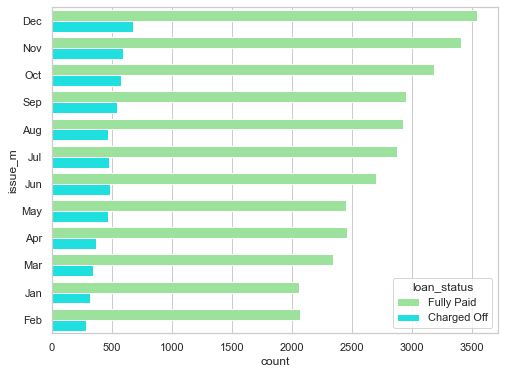

issue_m,Charged off %,Record count
Dec,0.160854,4215
May,0.159644,2919
Sep,0.156375,3498
Oct,0.154214,3761
Jun,0.151887,3180
Nov,0.149276,4006
Jul,0.142942,3351
Aug,0.138135,3388
Jan,0.134931,2379
Apr,0.130696,2831


In [84]:
Univariate_Categorical(column='issue_m')

###### The presence of specific celebrations can be the reason for more charge off 7th & 11th Months 

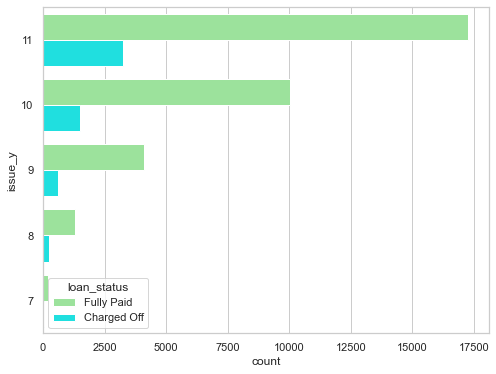

issue_y,Charged off %,Record count
7,0.179283,251
11,0.158705,20516
8,0.158131,1562
10,0.128772,11532
9,0.125954,4716


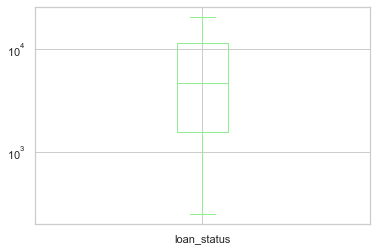

In [85]:
Univariate_Categorical(column='issue_y', box_plot=True)

##### From above plots the loan application received & charged off is more in December, the reason can be Christmas, New year, Thanks Giving.

##### May also have similar trend due to summer break & Celebrations (Memorial day and Independence day breaks in US)

# Bivariate Analysis
Now that we have analysed each of the variables and its impact on the loan-status, let us take group of variables together and analyse their combined effect on the loan-status. These categories are based on our business understanding. The original distribution column shows the average trend in all the data and we compare that with the data after applying our conditions.

In [86]:
def Bivariate_Analysis (*, data=loan_df1, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, split=True, figsize=figsize,
                   ax=ax, hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()

In [87]:
def Bivariate_Categorical (*, data=loan_df1, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='coolwarm')
    if title is not None:
        plt.title(title)
    plt.show()

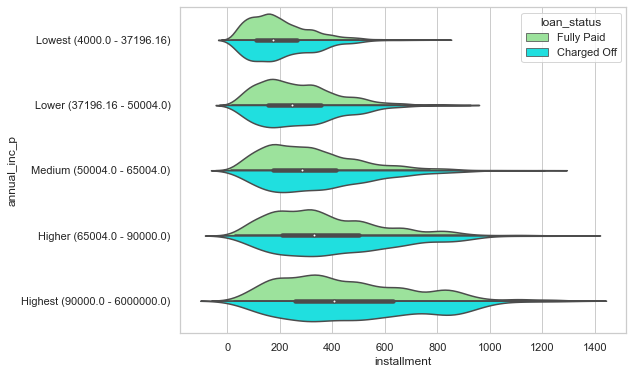

In [88]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

###### The Graphs is quite revealing the fact that shows that for higher instalments for any income group have more number of defaults.

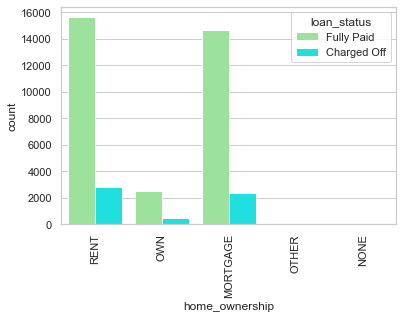

In [89]:
#plot of home_ownership and loan_status
sns.countplot(x='home_ownership',hue='loan_status', data=loan_df1)
plt.xticks(rotation=90)
plt.show()

###### The home_owner ship and effect of the loan status plotted above.

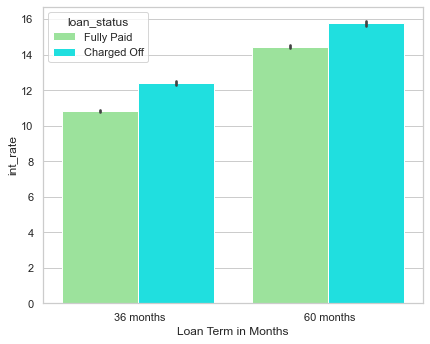

In [90]:
#plot of term and int_rate
fig, ax = plt.subplots(figsize = (15,12))
plt.subplot(221)
sns.barplot(x='term',y='int_rate',hue='loan_status',data=loan_df1)
plt.xlabel('Loan Term in Months')
plt.show()

###### As the interest rate and loan term increases the chance of charged off is more 

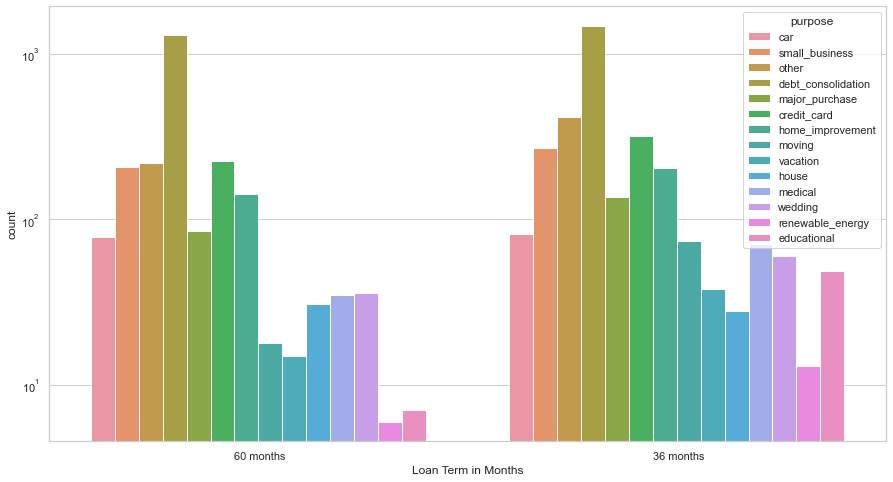

In [91]:
#plot of term and purpose
fig, ax = plt.subplots(figsize = (15,8)) 
ax.set(yscale = 'log')
sns.countplot( x="term", hue='purpose', data=loan_df1[loan_df1['loan_status']=='Charged Off'])
plt.xlabel('Loan Term in Months')
plt.show()

###### Plot of various income groups versus the risky purposes of loans for them. Some examples are: •small business loans for lowest and medium income groups •renewable energy loans for higher income group

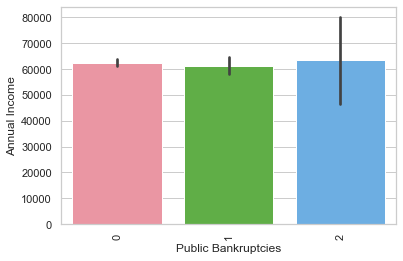

In [92]:
#plot of annual_inc and pub_rec_bankruptcies
sns.barplot(y='annual_inc', x='pub_rec', data=loan_df1[loan_df1['loan_status']=='Charged Off'])
plt.xticks(rotation=90)
plt.xlabel('Public Bankruptcies')
plt.ylabel('Annual Income')
plt.show()

###### public records (1 or 2) have impact on loan status

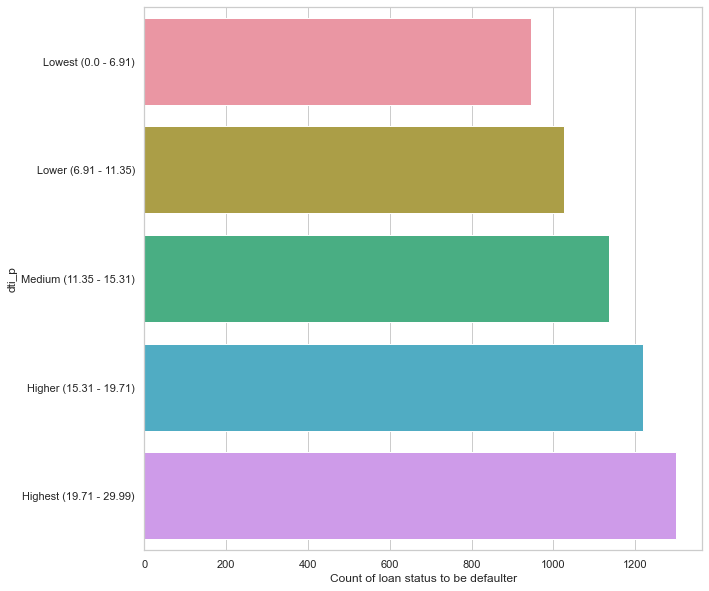

In [93]:
#plot of loan_status and addr_state
g = loan_df1[loan_df1['loan_status']=='Charged Off'].groupby('dti_p')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='dti_p', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('dti_p')
plt.show()

###### As the debt increases the chance to be default is getting increased 

In [94]:
loan_df1.issue_y

0        11
1        11
2        11
3        11
5        11
         ..
39712     7
39713     7
39714     7
39715     7
39716     7
Name: issue_y, Length: 38577, dtype: int64

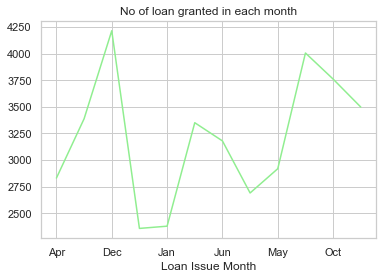

In [95]:
g = loan_df1.groupby('issue_m')['loan_status'].count()
g.plot.line(x_compat=True)
plt.title('No of loan granted in each month')
plt.xlabel('Loan Issue Month')
plt.show()

###### Medium debt-to-income group in the lowest income range is the riskiest when it comes to loan repayment.

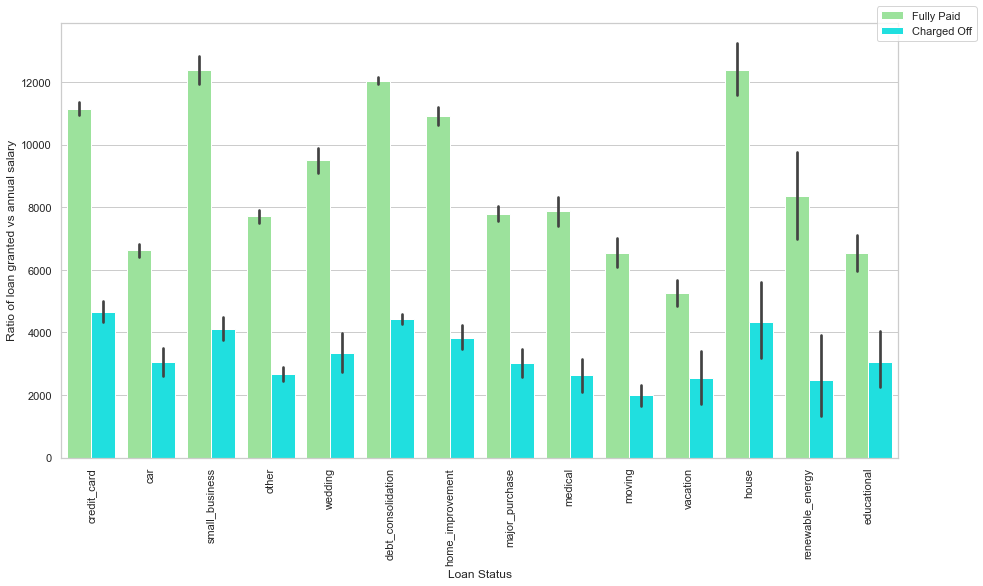

In [96]:
#plot of loan_inc_ratio and purpose
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x='purpose',y='total_rec_prncp',hue='loan_status',data=loan_df1)
plt.xticks(rotation=90)
#sns.lineplot(data =loan_data,y='loan_inc_ratio', x='issue_d_month', hue ='loan_status')
plt.xlabel('Loan Status')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

###### Above parameters have combined effect on loan status

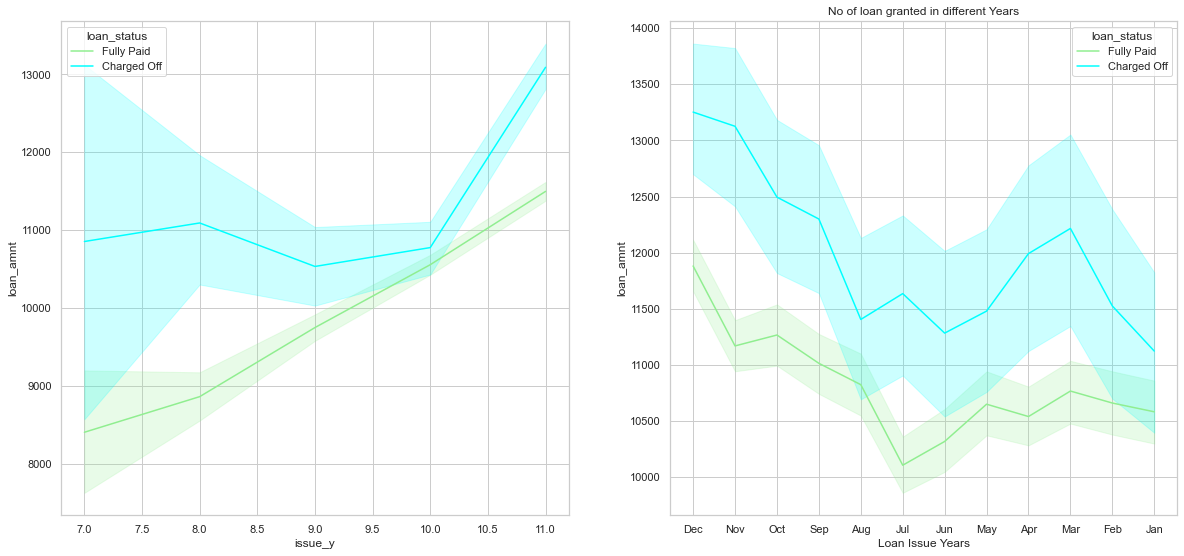

In [97]:
#plot of loan_status and issue_d_year and issue_d_month
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_df1,y='loan_amnt', x='issue_y', hue ='loan_status')
plt.subplot(222)
plt.title('No of loan granted in different months')
plt.xlabel('Loan Issue Mon')
sns.lineplot(data =loan_df1,y='loan_amnt', x='issue_m', hue ='loan_status')
plt.title('No of loan granted in different Years')
plt.xlabel('Loan Issue Years')
plt.show()

###### Loan issue month (Dec, May, Sep) have minor impact on loan status

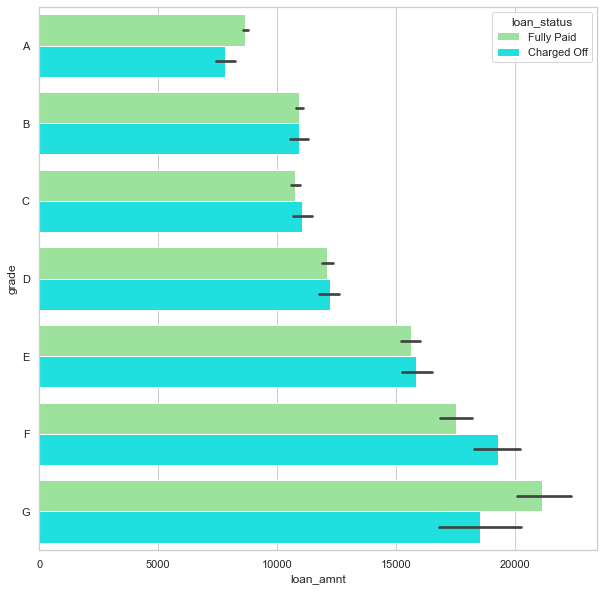

In [98]:
#plot of loan_amnt and grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df1,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

###### Loan grade  (D to G) have heavy impact in loan status

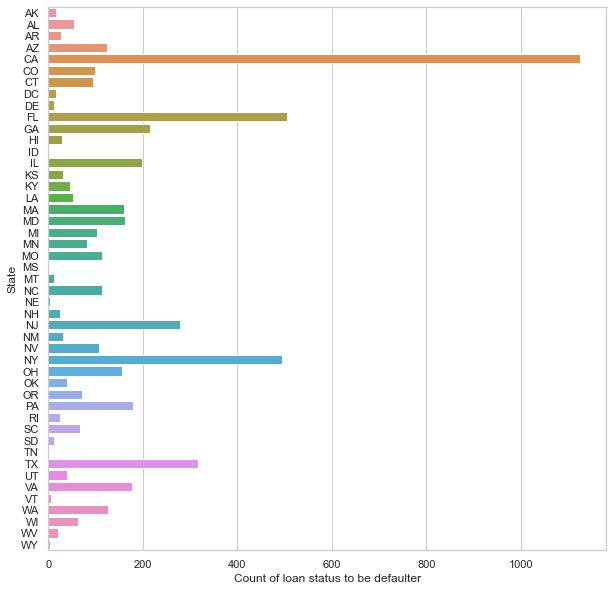

In [99]:
#plot of loan_status and addr_state
g = loan_df1[loan_df1['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

###### There is a combined effect in case of the loan charged off VS Resident Area

### Note 
###### Most of the observations are expressed along with the data set and plots, below is the executive summary

# Summary of Data Analysis & Observations 

We come to an end of the EDA of the loan data set and finding some of the drivers for loan default. Apart from the ones highlighted below, we are sure there will be multiple others too; however, according to us, these are the most impactful ones.

<b>Minor Impact</b> <br>
. Higher loan amount (above 16K) <br>
•Higher instalment amount (above 327) <br>
•Lower annual income (below 37K) <br> 
•Higher debt to income ratio (above 15%) <br>
•Applicant’s address state (NV, SD, AK, FL, etc.) <br>
•Loan issue month (Dec, May, Sep) <br>

<b>Heavy impact</b> <br>
•Higher interest rate (above 13%) <br>
•Higher revolving line utilization rate (above 58%) <br>
•Repayment term (5 years) <br> 
•Loan grade & sub-grade (D to G) <br>
•Loan purpose (small business, renewable energy, educational) <br>
•Derogatory public records (1 or 2) <br>
•Public bankruptcy records (1 or 2) <br>

<b>Combined impact</b> <br>
•High loan amount & interest rate for lower income group <br>
•High instalment and longer repayment term <br>
•Home ownership (other) and loan purpose (car, moving or small business) <br>
•Residential state and loan purpose<br> 
•Income group and loan purpose<br>

# Executive Summary


## Univariate Analysis
#### Positive Correlation with loan_amount, funded_amount, funded_amount_inv and installment.
#### Interest rate is higher, the chance for 'charged off' is more.
#### As loan amount is increasing, there is a high probability of loan getting default.
#### Higher the repayment term, chances of charge off will be higher.
#### Lower grades company default rate, is much higher than others.
#### Loan for small_business, renewable_energy and educational are the riskier ones.
#### The presence of specific celebrations can be the reason for more charge off 7th & 11th Months.

## Bivariate Analysis
### Higher instalments for any income group have more number of defaults.
### As the interest rate and Loan term increases the chance of charged off is more.
### As the debt increases the chance to be default is getting increased

# Conclusion
## Providing the loan to higher grade company employees.
## Less loan amount and less interest rate increase the probability of less Charge off.
## Higher annual income lesser the charge off so provides the loan to higher income employees.
## Providing the cc loans its helps to when customer is doing Charge off so we can cut the loan from cc account so it’s very help full and customer can enjoy holidays and celebration without any guilty and loan pressure.